# Exploratory Data Analysis (EDA)

The purpose of this notebook is to perform EDA on the cleaned data before modeling.

**Note:** Because of the subject matter of this project, this notebook MAY contains uncensored offensive language from the dataset.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')
# NLP libraries
import nltk
from sklearn.feature_extraction import text 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.naive_bayes import MultinomialNB

In [3]:
# loading in clean_df
clean_df = pd.read_pickle(r'C:\Users\Ricky\Desktop\4.2 FINAL SEMESTER\PROJECT II  Computer systems Project\rOOT\Preprocessing\clean_df.pkl')

In [4]:
clean_df.head(3)

,total_votes,hate_speech_votes,other_votes,label,tweet,clean_tweets
0,3,1,3,0,kindly say bickering to kikuyus and kalenjins....,kindly say bickering to kikuyus and kalenjins ...
1,3,1,3,0,kindly remind them that we do not have thoroug...,kindly remind them that we do not have thoroug...
2,3,1,3,0,kindly look at moses' statement. where has he ...,kindly look at moses statement where has he sa...


We already know that the vocabulary for this dataset is **51084 unique words.**

# Censoring Words

In [5]:
replacements = { 'bitch':'b**ch', 'bitches':'b**ches', 'nigga':'n***a', 'nigger':'ni**er', 'ass':'a**', 'hoe':'h**', 'hoes':'h**s', 'faggot':'fa***t', 'faggots':'fa***ts', 'fuck':'f**k','fucking':'f**king', 'pussy':'p**sy','upuusy':'*p***sy', 'fag':'f**', 'shit':'sh*t' }

for k, v in replacements.items():
    clean_df['clean_tweets'] = clean_df['clean_tweets'].str.replace(k, v)

In [6]:
# checking that worked
clean_df.head(3)

,total_votes,hate_speech_votes,other_votes,label,tweet,clean_tweets
0,3,1,3,0,kindly say bickering to kikuyus and kalenjins....,kindly say bickering to kikuyus and kalenjins ...
1,3,1,3,0,kindly remind them that we do not have thoroug...,kindly remind them that we do not have thoroug...
2,3,1,3,0,kindly look at moses' statement. where has he ...,kindly look at moses statement where has he sa...


## Most Frequent Words for Each Classification

In [7]:
# creating new dfs for each classification
df_freq_hate = clean_df[clean_df['label']==1]
df_freq_not_hate = clean_df[clean_df['label']==0]

In [8]:
# pulling out the text data for cleaned tweets
data_hate = df_freq_hate['clean_tweets']
data_not_hate = df_freq_not_hate['clean_tweets']

In [9]:
# function to tokenize tweets and remove stop words with NLTK built-in library
stop_words = set(stopwords.words('english'))
def process_tweet(text):
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed 

In [10]:
# creating lists for processed hate & not hate data
process_hate = list(map(process_tweet, data_hate))
process_not_hate = list(map(process_tweet, data_not_hate))

In [11]:
# exact amount of hate speech
total_vocab_hate = set()
for comment in process_hate:
    total_vocab_hate.update(comment)
len(total_vocab_hate)

8695

In [12]:
# exact amount of not hate speech
total_vocab_NOT_hate = set()
for comment in process_not_hate:
    total_vocab_NOT_hate.update(comment)
len(total_vocab_NOT_hate)

48862

## Most Common Words in Each Category

In [13]:
flat_hate = [item for sublist in process_hate for item in sublist]
flat_not_hate = [item for sublist in process_not_hate for item in sublist]

In [14]:
hate_freq = FreqDist(flat_hate)
not_hate_freq = FreqDist(flat_not_hate)

In [15]:
# Top 20 Hate Speech words:
hate_freq.most_common(41)

[('kikuyus', 1483),
 ('luos', 796),
 ('*', 484),
 ('kalenjins', 405),
 ('kill', 254),
 ('hate', 233),
 ('kenya', 226),
 ('uhuru', 209),
 ('people', 201),
 ('na', 196),
 ('ni', 188),
 ('like', 174),
 ('luhyas', 173),
 ('wakikuyu', 166),
 ('hawa', 160),
 ('u', 155),
 ('kikuyu', 151),
 ('dont', 147),
 ('raila', 141),
 ('wajaluo', 140),
 ('tribal', 137),
 ('know', 137),
 ('kambas', 131),
 ('us', 124),
 ('kenyans', 124),
 ('kisiis', 116),
 ('cant', 108),
 ('n', 106),
 ('never', 101),
 ('country', 100),
 ('one', 97),
 ('ya', 92),
 ('luo', 92),
 ('stupid', 91),
 ('tribes', 89),
 ('think', 86),
 ('thieves', 86),
 ('ruto', 85),
 ('f', 83),
 ('president', 82),
 ('r', 78)]

In [16]:
not_hate_freq.most_common(41)

[('kikuyus', 6562),
 ('*', 5104),
 ('luos', 3973),
 ('nyakundi', 2918),
 ('pictwittercom', 2850),
 ('kenya', 2502),
 ('people', 2466),
 ('like', 2226),
 ('us', 1998),
 ('na', 1994),
 ('dont', 1907),
 ('hate', 1866),
 ('one', 1812),
 ('uhuru', 1775),
 ('know', 1738),
 ('kenyans', 1735),
 ('u', 1648),
 ('ni', 1580),
 ('luhyas', 1520),
 ('kalenjins', 1496),
 ('raila', 1435),
 ('hawa', 1391),
 ('kill', 1285),
 ('maasai', 1280),
 ('jubilee', 1265),
 ('time', 1251),
 ('must', 1243),
 ('cant', 1203),
 ('masai', 1188),
 ('need', 1167),
 ('go', 1107),
 ('get', 1064),
 ('even', 1053),
 ('n', 1035),
 ('see', 1019),
 ('want', 997),
 ('think', 984),
 ('never', 980),
 ('ya', 973),
 ('say', 964),
 ('chase', 942)]

## Normalizing Word Frequencies

In [17]:
hate_total_word_count = sum(hate_freq.values())
hate_top_25 = hate_freq.most_common(41)
print("Hate Word \t Normalized Frequency")
print()
for word in hate_top_25:
    normalized_frequency = word[1]/hate_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Hate Word 	 Normalized Frequency

kikuyus 		 0.04466
luos 		 0.02397
* 		 0.01458
kalenjins 		 0.0122
kill 		 0.007649
hate 		 0.007017
kenya 		 0.006806
uhuru 		 0.006294
people 		 0.006053
na 		 0.005903
ni 		 0.005662
like 		 0.00524
luhyas 		 0.00521
wakikuyu 		 0.004999
hawa 		 0.004818
u 		 0.004668
kikuyu 		 0.004547
dont 		 0.004427
raila 		 0.004246
wajaluo 		 0.004216
tribal 		 0.004126
know 		 0.004126
kambas 		 0.003945
us 		 0.003734
kenyans 		 0.003734
kisiis 		 0.003493
cant 		 0.003252
n 		 0.003192
never 		 0.003042
country 		 0.003012
one 		 0.002921
ya 		 0.002771
luo 		 0.002771
stupid 		 0.00274
tribes 		 0.00268
think 		 0.00259
thieves 		 0.00259
ruto 		 0.00256
f 		 0.0025
president 		 0.002469
r 		 0.002349


In [18]:
not_hate_total_word_count = sum(not_hate_freq.values())
not_hate_top_25 = not_hate_freq.most_common(37)
print("Not Hate Word \t Normalized Frequency")
print()
for word in not_hate_top_25:
    normalized_frequency = word[1]/not_hate_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Not Hate Word 	 Normalized Frequency

kikuyus 		 0.0146
* 		 0.01136
luos 		 0.008842
nyakundi 		 0.006494
pictwittercom 		 0.006343
kenya 		 0.005568
people 		 0.005488
like 		 0.004954
us 		 0.004446
na 		 0.004438
dont 		 0.004244
hate 		 0.004153
one 		 0.004033
uhuru 		 0.00395
know 		 0.003868
kenyans 		 0.003861
u 		 0.003668
ni 		 0.003516
luhyas 		 0.003383
kalenjins 		 0.003329
raila 		 0.003194
hawa 		 0.003096
kill 		 0.00286
maasai 		 0.002849
jubilee 		 0.002815
time 		 0.002784
must 		 0.002766
cant 		 0.002677
masai 		 0.002644
need 		 0.002597
go 		 0.002464
get 		 0.002368
even 		 0.002343
n 		 0.002303
see 		 0.002268
want 		 0.002219
think 		 0.00219


### Visualizing Top Word Percentages

In [19]:
# create counts of hate and not hate with values and words
hate_bar_counts = [x[1] for x in hate_freq.most_common(20)]
hate_bar_words = [x[0] for x in hate_freq.most_common(20)]

not_hate_bar_counts = [x[1] for x in not_hate_freq.most_common(20)]
not_hate_bar_words = [x[0] for x in not_hate_freq.most_common(20)]

In [20]:
# set the color of the bar graphs
color = cm.magma(np.linspace(.4,.8, 30))

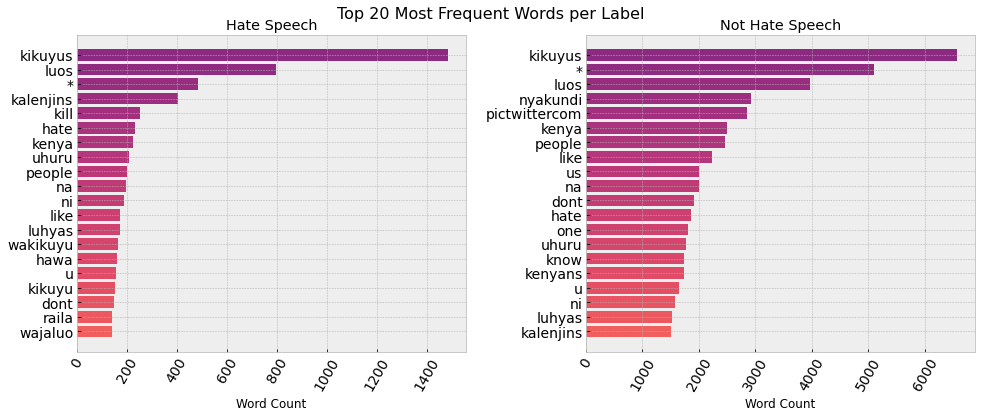

In [21]:
new_figure = plt.figure(figsize=(14,6))

ax = new_figure.add_subplot(121)
ax.invert_yaxis()

ax2 = new_figure.add_subplot(122)
ax2.invert_yaxis()

# generating a bar chart on each axes
ax.barh(hate_bar_words, hate_bar_counts, color=color)
ax2.barh(not_hate_bar_words, not_hate_bar_counts, color=color)

ax.title.set_text('Hate Speech')
ax2.title.set_text('Not Hate Speech')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60, fontsize=14)
    plt.xlabel("Word Count")
    plt.yticks(fontsize=14)
plt.tight_layout(pad=2)

new_figure.suptitle('Top 20 Most Frequent Words per Label', fontsize=16)

plt.savefig(r'C:\Users\Ricky\Desktop\4.2 FINAL SEMESTER\PROJECT II  Computer systems Project\rOOT\Preprocessing\visualizations\label_word_count_y.png', bbox_inches = "tight", pad_inches=.5)
plt.show()

Linguistically, it's important to note that the difference between hate speech and offensive lanugage often comes down to how it targets tribes/people from other communities, often in threatening ways. 

For instance, we can notice from this figure that Hate Speech typically contains the 'Kikuyus' . The use of this slur indicates far more malicious intent, which goes beyond possibly using the word as slang.

Examples like that demonstratee the neuances of English moreso in codeswitched slang and the fine line beteween Hate Speech and offensive language.

## What Words are Only in Hate Speech?

The purpose of this is to check whether the words unique to the "Hate Speech" label are threatening or especially derogatory.

In [22]:
def returnNotMatches(a, b):
    return [x for x in a if x not in b]

In [23]:
returnNotMatches(flat_hate, flat_not_hate)

['doanyone',
 'poveyshindwe',
 'regrate',
 'regrate',
 'kenyaknives',
 'sharpeningat',
 'badnw',
 'herelol',
 'puking',
 'uthamakinowonder',
 'vicinity',
 'haveturned',
 'apit',
 'andtoo',
 'thiscountry',
 'notasleep',
 'evenly',
 'aroundojinga',
 'malignant',
 'pedophilesask',
 'mutalia',
 'watamature',
 'inge',
 'prescribiwa',
 'vijiko',
 'watapike',
 'ibaki',
 'peoplethis',
 'ananisukuma',
 'evilyaani',
 'wanakwamana',
 'mnawabeba',
 'mnawapeleka',
 'hobela',
 'hobela',
 'ajuogaawuoro',
 'fuatilia',
 'niyao',
 'manina',
 'mtaeza',
 'twawazamisha',
 'baharini',
 'orielly',
 'brutallity',
 'overdueeye',
 'illegitimately',
 'detrays',
 'butches',
 'cannibals',
 'mamungikiansmajority',
 'swampy',
 'crudely',
 'peoplethev',
 'lways',
 'civilise',
 'foodies',
 'foodies',
 'tweetfacebook',
 'waythey',
 'yeahi',
 'yeahtuko',
 'kabisaawe',
 'tutalitatua',
 'hiyi',
 'flymy',
 'backtracking',
 'wowowo',
 'aaargh',
 'joymalaya',
 'corruptbuana',
 'whispers',
 'ubebe',
 'nasathese',
 'hereare',


As expected, a majority of these are tribalistic, sexist and demeaning slurs that exceed cultural slang ni  codeswitched communication. The fact that these words are unique to the "Hate Speech" label affirm that it's indeed hate speech that should be flagged and taken down.

## Visualizing Unique Words with Venn Diagram

In [24]:
import matplotlib_venn as venn
from matplotlib_venn import venn2, venn2_circles, venn3, venn3_circles
import matplotlib.pyplot as plt

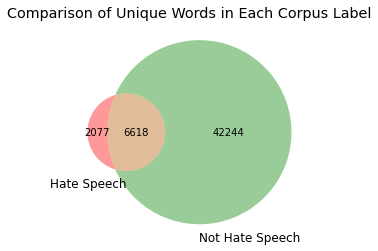

In [25]:
venn2([set(flat_hate), set(flat_not_hate)], set_labels = ('Hate Speech', 'Not Hate Speech'))
plt.title('Comparison of Unique Words in Each Corpus Label')
plt.savefig(r'C:\Users\Ricky\Desktop\4.2 FINAL SEMESTER\PROJECT II  Computer systems Project\rOOT\Preprocessing\visualizations\banner.png', bbox_inches = "tight", pad_inches=.5)

## Word Clouds

In [26]:
from wordcloud import WordCloud
hate_dict = dict(zip(hate_bar_words, hate_bar_counts))
not_hate_dict = dict(zip(not_hate_bar_words, not_hate_bar_counts))

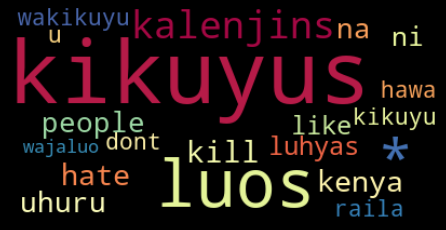

In [27]:
# create the word cloud:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(hate_dict)

# Display the generated image w/ matplotlib:
plt.figure(figsize=(6,6), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
plt.savefig(r'C:\Users\Ricky\Desktop\4.2 FINAL SEMESTER\PROJECT II  Computer systems Project\rOOT\Preprocessing\visualizations\satire_wordcloud.png')

plt.show()

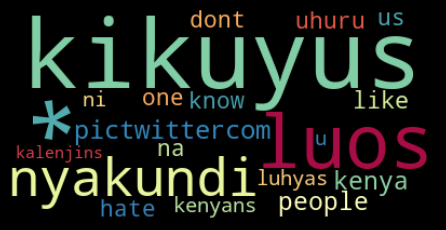

In [28]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(not_hate_dict)

plt.figure(figsize=(6,6), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig(r'C:\Users\Ricky\Desktop\4.2 FINAL SEMESTER\PROJECT II  Computer systems Project\rOOT\Preprocessing\visualizations\not_satire_wordcloud.png')

plt.show()

These word clouds are pretty much unusable on public-facing documents, but they tell us that the top words for each label are very similar. It may be hard for the models to differentiate beteween what can be classified as hate speech or not.

In [29]:
tweet_df = clean_df[['clean_tweets', 'label']].copy()

In [39]:
tweet_df.to_csv('../src/corpus.txt', sep='\t')

In [40]:
import stylecloud
stylecloud.gen_stylecloud(file_path = r'../src/corpus.txt', icon_name= 'fab fa-twitter', collocations=False, output_name = r"C:\Users\Ricky\Desktop\4.2 FINAL SEMESTER\PROJECT II  Computer systems Project\rOOT\Preprocessing\visualizations\icon_cloud.png")
#plt.show()


## CrowdFlower Votes

The first 3 columns of the dataframe indicate how many votes went into decided each label. Each tweet's label was decided by majority-rules. Let's see if we can pull any useful information from these columns.

In [38]:
clean_df.head(3)

,total_votes,hate_speech_votes,other_votes,label,tweet,clean_tweets
0,3,1,3,0,kindly say bickering to kikuyus and kalenjins....,kindly say bickering to kikuyus and kalenjins ...
1,3,1,3,0,kindly remind them that we do not have thoroug...,kindly remind them that we do not have thoroug...
2,3,1,3,0,kindly look at moses' statement. where has he ...,kindly look at moses statement where has he sa...


<AxesSubplot:>

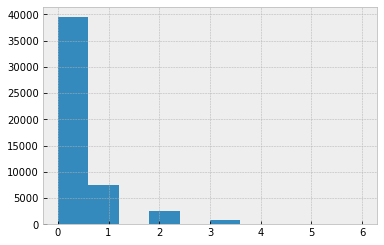

In [32]:
# distribution of vote counts for hate_speech_votes
clean_df.hate_speech_votes.hist()

<AxesSubplot:>

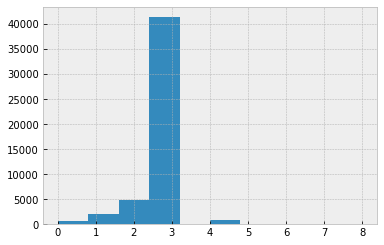

In [33]:
# distribution of vote counts for other_votes
clean_df.other_votes.hist()

### EDA on `total_votes` column

<AxesSubplot:>

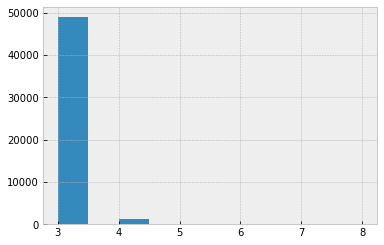

In [34]:
clean_df.total_votes.hist()